In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

In [2]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^5$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [3]:
data=np.exp(random.randn(100_000)) # mean of zero standard deviation of 1

__In the below code box, plot a histogram of the array `data` as one figure and a histogram of the log of the data as a second figure.  Use 100 bins for each plot. Note:__ if you precede each plotting command by  `plt.figure()` it will make the plot on a separate set of axes, even if the code is in the same cell...

(array([5.23782157e-01, 3.24477091e-01, 1.57449398e-01, 8.24153049e-02,
        4.73730628e-02, 2.87966012e-02, 1.95145420e-02, 1.31207832e-02,
        8.72661683e-03, 6.66530847e-03, 4.52994113e-03, 3.56717435e-03,
        2.99938881e-03, 1.95021989e-03, 1.51820915e-03, 1.38243435e-03,
        1.02448260e-03, 7.52932994e-04, 6.04815028e-04, 5.06069717e-04,
        3.94981243e-04, 3.82638079e-04, 4.56697062e-04, 2.83892768e-04,
        1.72804294e-04, 1.72804294e-04, 1.23431638e-04, 9.87453107e-05,
        8.64021469e-05, 1.48117966e-04, 7.40589830e-05, 7.40589830e-05,
        8.64021469e-05, 6.17158192e-05, 3.70294915e-05, 3.70294915e-05,
        8.64021469e-05, 4.93726553e-05, 2.46863277e-05, 2.46863277e-05,
        1.23431638e-05, 2.46863277e-05, 3.70294915e-05, 1.23431638e-05,
        1.23431638e-05, 2.46863277e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.23431638e-05, 0.00000000e+00,
        3.70294915e-05, 0.00000000e+00, 0.00000000e+00, 2.468632

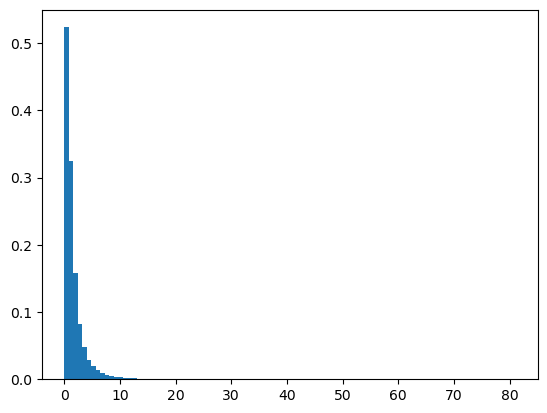

In [4]:
plt.hist(data,bins=100,density=True)

Calculating the mean:

In [5]:
print(np.mean(data))
print( data.mean() )

1.644803765005128
1.644803765005128


Calculating the median:

In [6]:
print(np.median(data))

1.000264307453933


Calculating the mode:

In [7]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data,decimals=2)
print(f'Rounded: {stats.mode(data_r)}' )

Unrounded: ModeResult(mode=np.float64(0.015030745544200462), count=np.int64(1))
Rounded: ModeResult(mode=np.float64(0.34), count=np.int64(707))


In [8]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.3400000000000001


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [9]:
def mode2(data,**kwargs):
## kwargs is a keyword and an equals.
# Really nice because **kwargs can be passed in any order.
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range).
# as those are unlikely to be what you want
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

In [10]:
bins = np.linspace(-0.005,10.005,1002)
print(mode2(data,bins=bins))

0.3400000000000001


# Calculating measures of scale

First, the standard deviation:


In [11]:
print( np.std(data),np.std(data,ddof=1)) # ddof divides by N-1
print( np.std(np.log(data)),np.std(np.log(data),ddof=1))

2.141857735356803 2.1418684447258003
0.9987692253769432 0.9987742192605242


### Now, the average absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation for the log-normal or normally-distributed data?__


In [12]:
normavgabsdev = np.mean(np.abs(data-data.mean()))/0.7979
mnlog = np.mean(np.log(data) ) # mean of log(data)
normavgabsdev_log = np.mean(np.abs( np.log(data)-mnlog) )/0.7979

print(f'Normalized Average Absolute Deviation: {normavgabsdev:.5f}')
print(f'Normalized Average Absolute Deviation of log(data): {normavgabsdev_log:.5f}')

Normalized Average Absolute Deviation: 1.57669
Normalized Average Absolute Deviation of log(data): 1.00074


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [13]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745
normmad_scipy = stats.median_abs_deviation(data,scale='normal')

print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Scipy Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Median Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.89350
Scipy Normalized Median Absolute Deviation: 0.89350
Normalized Median Absolute Deviation of log(data): 1.00756


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [14]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 1.08499
Normalized IQR of log(data): 1.00712


# Results when averaging data together

In [15]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg) # randn - mean of zero standard deviation of 1

# average each set of navg values
means=np.mean(data,axis=1)


- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

Standard Deviation of the Means n_avg = 100: 0.09976064007745494


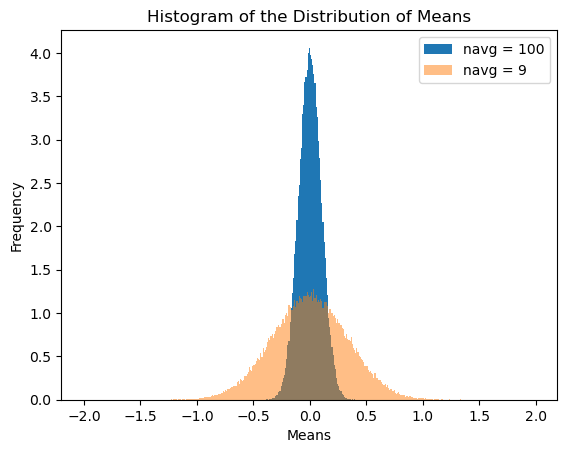

Standard Deviation of the Means for navg = 9: 0.33332649609366516


In [16]:
plt.hist(means, bins=np.arange(-2, 2, 0.01), range=(-2, 2), density=True, label=f'navg = {navg}')
plt.xlabel('Means')
plt.ylabel('Frequency')
plt.title('Histogram of the Distribution of Means')

std_means = np.std(means)
print(f'Standard Deviation of the Means n_avg = 100: {std_means}')


# Create a second set of simulations with navg = 9
navg2 = 9
data2 = random.randn(nsims, navg2)
means2 = np.mean(data2, axis=1)

# Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements
plt.hist(means2, bins=np.arange(-2, 2, 0.01), range=(-2, 2), density=True, alpha=0.5, label=f'navg = {navg2}')
plt.xlabel('Means')
plt.ylabel('Frequency')
plt.title('Histogram of the Distribution of Means')
plt.legend()
plt.show()

# Determine the standard deviation of the array of means for navg = 9
std_means2 = np.std(means2)
print(f'Standard Deviation of the Means for navg = {navg2}: {std_means2}')

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

# If you have extra time

- Try a wide variety of binnings and explore how the mode of our lognormal data changes as the bin size does.

- Create a dataset that is drawn from two different distributions:
    - 90% of the time draw from a standard normal ($N(0,1)$)
    - 10% of the time draw a value from a different distribution: $\exp(N(0,1)$)

    Calculate all of our measures of location and scale for this mixed dataset.  Which (if any) give you the expected values for a standard normal distribution?
